In [2]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.rand(2, 1)

array([[0.0103059 ],
       [0.85179026]])

In [4]:
X = 2*abs(np.random.randn(100, 1))
Y = 4 + 3*(X + abs(np.random.randn(100, 1)))

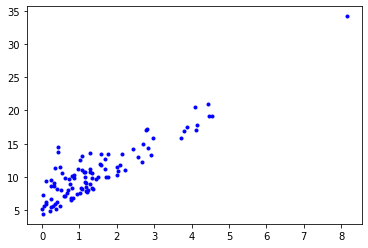

In [4]:
plt.plot(X, Y, 'b.')

In [5]:
X_b = np.c_[np.ones(X.shape), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
X_b

array([[1.        , 1.54952128],
       [1.        , 1.25069968],
       [1.        , 0.90887123],
       [1.        , 0.33969431],
       [1.        , 1.56508202],
       [1.        , 5.13968791],
       [1.        , 2.09659627],
       [1.        , 4.38477013],
       [1.        , 2.20561043],
       [1.        , 1.83204114],
       [1.        , 0.11841835],
       [1.        , 0.07687608],
       [1.        , 2.55881595],
       [1.        , 1.35186036],
       [1.        , 1.44351905],
       [1.        , 2.12911953],
       [1.        , 0.23158109],
       [1.        , 0.31235148],
       [1.        , 2.46464097],
       [1.        , 2.36767102],
       [1.        , 2.50151664],
       [1.        , 0.71805476],
       [1.        , 0.64385478],
       [1.        , 1.1100855 ],
       [1.        , 0.98937641],
       [1.        , 0.78931285],
       [1.        , 3.45961916],
       [1.        , 0.73363785],
       [1.        , 0.96632989],
       [1.        , 1.39758303],
       [1.

[[ 6.44374779]
 [24.32829848]]


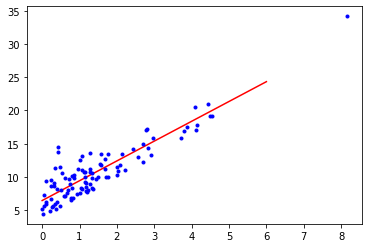

In [6]:
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, 'b.')

# Gradient Descent

In [9]:
## Batch Gradient Descent
eta = 0.1
m = 100
n_iterations = 1000
theta = np.random.rand(2, 1)  # Random initialization

for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    print(gradient)
    print()
    if i == 3:
        break
    theta = theta - eta*gradient
theta

[[-19.48458555]
 [-36.70283641]]

[[-4.32449456]
 [-4.29379266]]

[[-2.14193909]
 [ 0.12524609]]

[[-1.75198613]
 [ 0.6923634 ]]



array([[3.49956825],
       [4.4292678 ]])

In [8]:
## Stochastic Gradient Descent
n_epochs = 50
m = 100
t0, t1 = 5, 50
theta = np.random.rand(2, 1)  # Random initialization

def learning_schedule(t):
    return t0/(t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        ran = np.random.randint(m)
        xi = X_b[ran:ran+1]
        yi = Y[ran:ran+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[6.4842099 ],
       [2.84330311]])

# Learning Curves

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

m = 100
X = 3*(np.random.randn(m, 1))
y = X**2 + 2*X + 4*abs(np.random.randn(m,1))


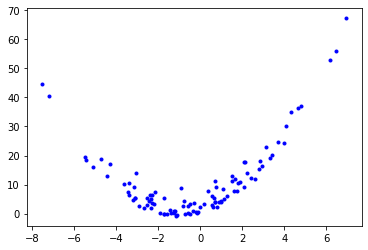

In [10]:
plt.plot(X, y, "b.")

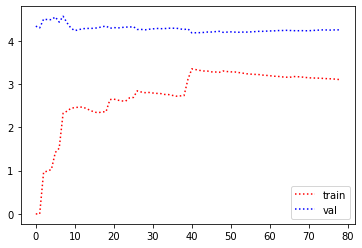

In [11]:
# Trying to fit a linear model to quadratic data
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_err, val_err = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_err.append(np.sqrt(mean_squared_error(y_train[:m], y_train_pred)))
        val_err.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    
    plt.plot(np.sqrt(train_err), "r:", label="train")
    plt.plot(np.sqrt(val_err), "b:", label="val")
    plt.legend()
plot_learning_curves(LinearRegression(), X, y)

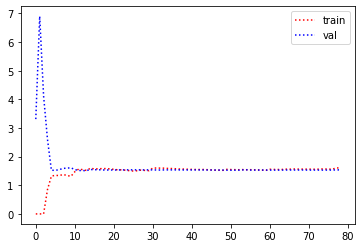

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)), ("lin_reg", LinearRegression())])
plot_learning_curves(pipe, X, y)

In [13]:
# Stochastic gradient descent for polynomial

X_b = np.c_[np.ones(X.shape), X, X**2]
theta = np.random.randn(3, 1)
n_epochs = 500
eta = 0.05

for k in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradient = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(k*m + i)
        theta = theta - eta*gradient
theta


array([[-6.52204615e+154],
       [-5.69704502e+152],
       [ 1.94248318e+153]])

In [14]:
# Full Batch gradient descent

X_b = np.c_[np.ones(X.shape), X, X**2]
theta = np.random.randn(3, 1)
n_iterations = 1000
eta = 0.01
m = 100

for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

<ipython-input-14-353e19388601>:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta*gradients


In [15]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.07624288],
       [2.11982911],
       [1.00676355]])

NameError: name 'x' is not defined

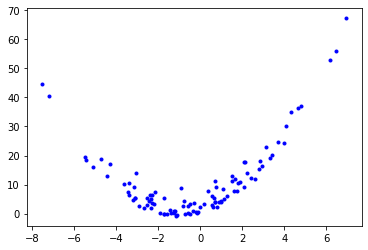

In [16]:
plt.plot(X, y, 'b.')

t = [theta_best[2, 0] * (i**2) + theta_best[1, 0] * i + theta_best[0, 0] for i in x]
plt.plot(x, t)

# Early Stopping

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

sgd_reg = SGDRegressor(warm_start=True)
best_model = None
best_epoch = None
best_score = float('inf')
n_epochs = 1000
pipe = Pipeline([("poly", PolynomialFeatures(degree=90, include_bias=False)), ("scaler", StandardScaler())])

X_train_scaled = pipe.fit_transform(X_train)
X_val_scaled = pipe.transform(X_val)

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_scaled, y_train.ravel())
    X_val_pred = sgd_reg.predict(X_val_scaled)
    score = mean_squared_error(X_val_pred, y_val)
    
    if score < best_score:
        best_score = score
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
        
(best_score, best_epoch)


# Logistic Regression